In [1]:
import networkx as nx
%matplotlib inline

In [3]:
#create object from Graph to build indirect graph
g = nx.Graph()

In [4]:
#if you want to know info about something use help method
help(nx.Graph())

Help on Graph in module networkx.classes.graph object:

class Graph(builtins.object)
 |  Graph(incoming_graph_data=None, **attr)
 |  
 |  Base class for undirected graphs.
 |  
 |  A Graph stores nodes and edges with optional data, or attributes.
 |  
 |  Graphs hold undirected edges.  Self loops are allowed but multiple
 |  (parallel) edges are not.
 |  
 |  Nodes can be arbitrary (hashable) Python objects with optional
 |  key/value attributes, except that `None` is not allowed as a node.
 |  
 |  Edges are represented as links between nodes with optional
 |  key/value attributes.
 |  
 |  Parameters
 |  ----------
 |  incoming_graph_data : input graph (optional, default: None)
 |      Data to initialize graph. If None (default) an empty
 |      graph is created.  The data can be any format that is supported
 |      by the to_networkx_graph() function, currently including edge list,
 |      dict of dicts, dict of lists, NetworkX graph, NumPy matrix
 |      or 2d ndarray, SciPy sparse

In [5]:
# To add single node
g.add_node('a') 

In [6]:
list_of_nodes = ['b','b','c','d','s']

In [7]:
g.add_nodes_from(list_of_nodes)

In [8]:
g.add_edge('a','c')

In [9]:
edges = [('a','d'),('c','b'),('a','b'),('c','d'),('d','b'),('a','s'),('b','s'),('c','s'),('d','s')]

In [10]:
g.add_edges_from(edges)

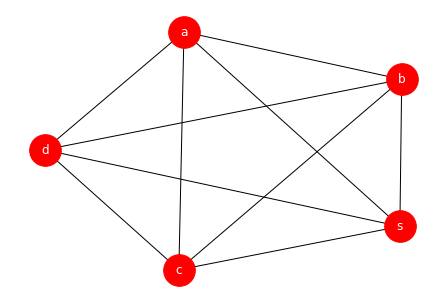

In [11]:
#nx.draw(graph object,with_labels=true->yes|false->no,node_color='color name',node_size=number refer font size,font_color='color name)
nx.draw(g,with_labels=True,node_color='red',node_size=1000,font_color='white')

In [13]:
#to get graph nodes
g.nodes()

NodeView(('a', 'b', 'c', 'd', 's'))

In [14]:
# to get all of the edges
g.edges()

EdgeView([('a', 'c'), ('a', 'd'), ('a', 'b'), ('a', 's'), ('b', 'c'), ('b', 'd'), ('b', 's'), ('c', 'd'), ('c', 's'), ('d', 's')])

In [15]:
for n in g.nodes:
    print(n)

a
b
c
d
s


In [16]:
for e in g.edges:
    print(e[0])

a
a
a
a
b
b
b
c
c
d


In [17]:
for e in g.edges:
    print(e)

('a', 'c')
('a', 'd')
('a', 'b')
('a', 's')
('b', 'c')
('b', 'd')
('b', 's')
('c', 'd')
('c', 's')
('d', 's')


In [18]:
g.number_of_nodes()

5

In [19]:
g.number_of_edges()

10

In [20]:
for n in g.nodes:
    print('---------------------------',n)
    for h in g.neighbors(n):
        print(h)

--------------------------- a
c
d
b
s
--------------------------- b
c
a
d
s
--------------------------- c
a
b
d
s
--------------------------- d
a
c
b
s
--------------------------- s
a
b
c
d


In [21]:
#to chieck graph is tree or not
nx.is_tree(g)

False

In [22]:
nx.is_connected(g)

True

In [23]:
# to check graph has a spicific node or not
g.has_node('a')

True

In [24]:
g.has_node('z')

False

In [25]:
# anther way to check a node in graph nodes or not
'a' in g.nodes

True

In [27]:
# to get neighbors of node
g.neighbors('b')

In [28]:
for neighbor in g.neighbors('b'):
    print(neighbor)

c
a
d
s


In [29]:
# to know degree 'number of neighbors' according a specific node
g.degree('a')

4

In [32]:
#----Exercise 1-----#
def get_leaves(Graph):
    result = []
    for node in Graph.nodes:
        if Graph.degree(node) == 1:
            result.append(node)
    return result

get_leaves(g)

[]

In [33]:
# comprehensions
items = ['spider', 'y', 'banana']
[item.upper() for item in items]

['SPIDER', 'Y', 'BANANA']

In [34]:
print(g.nodes())
print([g.degree(n) for n in g.nodes()])

['a', 'b', 'c', 'd', 's']
[4, 4, 4, 4, 4]


In [35]:
max(len(item) for item in items)

6

In [36]:
sorted(item.upper() for item in items)

['BANANA', 'SPIDER', 'Y']

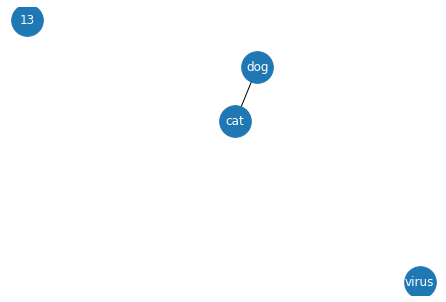

In [37]:
# Node names
G = nx.Graph()

G.add_nodes_from(['cat','dog','virus',13])

G.add_edge('cat','dog')

nx.draw(G, with_labels=True, font_color='white', node_size=1000)

In [51]:
# NetworkX provides a way to read a graph from an adjacency list
print(open('./Sallam.adjlist').read())

Sallam Rady Ramadan
kjnkjn


In [52]:
# create direct graph
dG = nx.DiGraph()

In [53]:
dG.add_edges_from([(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)])

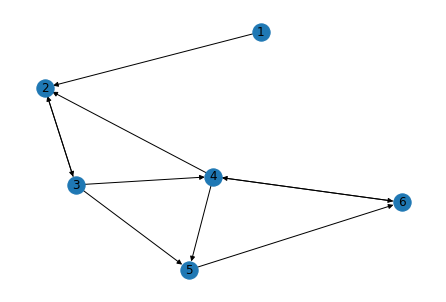

In [54]:
nx.draw(dG, with_labels=True)

In [55]:
dG.has_edge(1,2)

True

In [56]:
dG.has_edge(2,1)

False

In [57]:
print('Successors of 2:', list(dG.successors(2)))

Successors of 2: [3]


In [58]:
print('Predecessors of 2:', list(dG.predecessors(2)))

Predecessors of 2: [1, 3, 4]


In [62]:
# ---- Exercise  2----- #
def max_degree(Graph):
    mx = 0
    for node in Graph.nodes:
        if Graph.degree(node) > mx:
            result = (node,Graph.degree(node))
            mx = Graph.degree(node)
    return result

max_degree(g)

('a', 4)

In [67]:
# ---- Exercise  3----- #
def mutual_friends(Graph,n1,n2):
    result = []
    for node in Graph.nodes:
        if node in Graph.neighbors(n1) and node in Graph.neighbors(n2):
            result.append(node)
            
    return result

mutual_friends(g,'a','b')

['c', 'd', 's']